<a href="https://colab.research.google.com/github/rohanramesh38/ML-Socure/blob/master/ML_Socure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/VishalTennyson/ML.git
%cd ML/
%ls

Cloning into 'ML'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 4), reused 25 (delta 2), pack-reused 0
Unpacking objects: 100% (30/30), done.
/content/ML
'Activation functions.ipynb'   heart.csv     'Logistic Regression-Copy1.ipynb'
 competition-data/             IIT_Shastra/  'Logistic Regression.ipynb'
 dataset.csv                   Iris.csv       Untitled.ipynb


In [2]:
%cd competition-data/competition-data
%ls

/content/ML/competition-data/competition-data
sample_submission.csv*  test.csv*  train.csv*


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.read_csv("train.csv")

In [5]:
train.iloc[:,10:]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [0]:
sns.pairplot(train,vars=train.columns[10:14])

In [0]:
sns.pairplot(train,vars=train.columns[14:18])

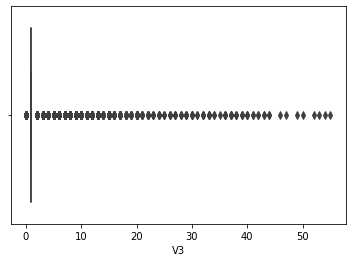

In [8]:
sns.boxplot(x=train['V3'])

In [9]:
for i in train.columns[10:50]:
  print(i,end ="---")
  print(train[i].isnull().sum(),end ="---")
  print(train[i].count())

V1---345002---97844
V2---345002---97844
V3---338032---104814
V4---0---442846
V5---0---442846
V6---338032---104814
V7---381342---61504
V8---0---442846
V9---126827---316019
V10---0---442846
V11---210656---232190
V12---0---442846
V13---10---442836
V14---345002---97844
V15---57916---384930
V16---938---441908
V17---0---442846
V18---345002---97844
V19---66948---375898
V20---345002---97844
V21---66912---375934
V22---126790---316056
V23---0---442846
V24---0---442846
V25---57916---384930
V26---938---441908
V27---938---441908
V28---386667---56179
V29---66948---375898
V30---66948---375898
V31---938---441908
V32---197156---245690
V33---938---441908
V34---338032---104814
V35---345002---97844
V36---338181---104665
V37---345002---97844
V38---0---442846
V39---0---442846
V40---10---442836


In [10]:
imp=Imputer(missing_values="NaN", strategy="most_frequent") #specify axis
imp.fit(train[["V16"]])
train["V16"]=imp.transform(train[["V16"]])
train.iloc[:,10:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [11]:
imp=Imputer(missing_values="NaN", strategy="mean") #specify axis
imp.fit(train[["V40"]])
train["V40"]=imp.transform(train[["V40"]])
train.iloc[:,10:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [12]:
imp=Imputer(missing_values="NaN", strategy="most_frequent") #specify axis
imp.fit(train[["V31"]])
train["V31"]=imp.transform(train[["V31"]])
train.iloc[:,10:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [13]:
imp=Imputer(missing_values="NaN", strategy="most_frequent") #specify axis
imp.fit(train[["V26"]])
train["V26"]=imp.transform(train[["V26"]])
train.iloc[:,10:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [14]:
imp=Imputer(missing_values="NaN", strategy="most_frequent") #specify axis
imp.fit(train[["V27"]])
train["V27"]=imp.transform(train[["V27"]])
train.iloc[:,10:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [15]:
imp=Imputer(missing_values="NaN", strategy="most_frequent") #specify axis
imp.fit(train[["V33"]])
train["V33"]=imp.transform(train[["V33"]])
train.iloc[:,10:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,NaN,NaN,NaN,86400,0,NaN,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,NaN,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,NaN,NaN,NaN,86401,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,NaN,NaN,NaN,86469,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,NaN,NaN,NaN,86499,0,NaN,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,NaN,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,1.0,1.0,1.0,86506,0,1.0,0.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,NaN,NaN,NaN,15810626,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,NaN,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,NaN,NaN,NaN,15810774,0,NaN,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,NaN,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,1.0,1.0,1.0,15810912,1,1.0,NaN,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,NaN,NaN,NaN,15810926,0,NaN,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,NaN,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [16]:
limitPer = len(train) * .20
dropped = train.dropna(thresh=limitPer,axis=1)
print(train.shape)
print(dropped.shape)
dropped

(442846, 51)
(442846, 49)


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,502,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,86400,0,NaN,1,NaN,1,NaN,1,117.0,NaN,1.0,1.0,68.500,NaN,1.0,NaN,0.0,NaN,0,0,1.0,1.0,0.00,0.0,1.0,0.00,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,1,1,1,0,1,1,1,1,0,0,NaN,NaN,NaN,86401,0,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,29.000,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,2,2,2,0,2,2,1,0,0,0,NaN,NaN,NaN,86469,0,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,59.000,NaN,1.0,NaN,315.0,0.0,0,0,1.0,1.0,0.00,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,3,3,3,0,3,3,1,1,0,0,NaN,NaN,NaN,86499,0,NaN,25,1.0,1,112.0,2,1404.0,NaN,1.0,0.0,50.000,NaN,1.0,NaN,111.0,94.0,0,0,1.0,0.0,0.00,1.0,1.0,0.00,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073
4,4,4,1,0,1,4,2,2,0,1,1.0,1.0,1.0,86506,0,1.0,1,NaN,1,NaN,1,0.0,0.0,NaN,1.0,50.000,1.0,NaN,1.0,NaN,NaN,0,1,NaN,1.0,0.00,NaN,NaN,0.00,NaN,0.0,1.0,1.0,1.0,0.0,0,1,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,60,36,6,0,4,1132,1,0,0,0,NaN,NaN,NaN,15810626,0,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,2.0,764.000,NaN,1.0,NaN,0.0,0.0,0,0,1.0,2.0,0.00,1.0,1.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.005286
442842,197,10,8,0,3,562,2,2,0,0,NaN,NaN,NaN,15810774,0,NaN,0,1.0,0,NaN,1,0.0,NaN,1.0,0.0,1659.950,NaN,1.0,NaN,83.0,83.0,0,0,0.0,0.0,0.00,1.0,1.0,0.00,83.0,83.0,NaN,NaN,NaN,NaN,0,0,0.0,0.002689
442843,15,265,1,2,7,7095,0,2,1,2,1.0,1.0,1.0,15810912,1,1.0,0,1.0,0,NaN,1,0.0,0.0,1.0,1.0,73.838,1.0,1.0,1.0,0.0,0.0,1,1,0.0,1.0,0.00,1.0,1.0,0.00,NaN,0.0,1.0,1.0,1.0,0.0,1,1,0.0,0.187073
442844,21,15,3,0,1,79,2,2,0,0,NaN,NaN,NaN,15810926,0,NaN,1,1.0,1,NaN,1,0.0,NaN,1.0,1.0,400.780,NaN,1.0,NaN,0.0,0.0,0,0,0.0,1.0,0.00,1.0,1.0,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.004560


In [17]:
train.model_score.value_counts().sort_values()

0.049920      1
0.002156      1
0.003264      1
0.002974      1
0.995788      1
           ... 
0.001413     51
0.005928     61
0.001158     69
0.001236    201
0.001228    466
Name: model_score, Length: 429117, dtype: int64

In [18]:
np.sort(train.model_score.unique(),axis=None) 

array([3.28030849e-05, 4.57759083e-05, 5.05127284e-05, ...,
       9.99908999e-01, 9.99932890e-01, 9.99941158e-01])

In [0]:
unique, counts = np.unique(train.model_score, return_counts=True)

In [20]:
print(unique)
print(np.unique(counts))
print( np.unique(counts).shape)
print(counts.shape)
unique[np.where(counts==466)]

[3.28030849e-05 4.57759083e-05 5.05127284e-05 ... 9.99908999e-01
 9.99932890e-01 9.99941158e-01]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  27  28  35  44  46  47  50  51  61  69 201 466]
(36,)
(429117,)


array([0.00122835])

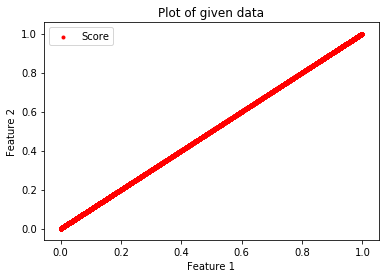

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train.model_score, train.model_score, color = 'red', label = 'Score',marker=".") 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend()  
plt.show() 

No handles with labels found to put in legend.


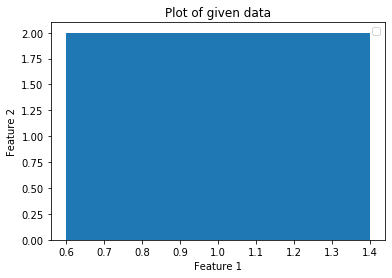

In [22]:
plt.bar(unique[429107:429117], counts[429107:429117])
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend()  
plt.show() 

In [23]:
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X = pd.DataFrame(my_imputer.fit_transform(train))

# Imputation removed column names; put them back
imputed_X.columns = train.columns
imputed_X

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.343506,1.251533,1.16037,86400.0,0.0,1.039203,0.776941,1.0,1.121622,1.0,169.216577,1.0,117.0,0.092678,1.000000,1.0,68.500,1.177691,1.000000,1.11362,0.000000,139.777574,0.0,0.0,1.000000,1.0,0.00,145.729104,0.000000,1.000000,0.00,13.000000,14.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,1.0,0.003666
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.343506,1.251533,1.16037,86401.0,0.0,1.039203,0.776941,1.0,1.000000,1.0,169.216577,1.0,0.0,0.092678,1.000000,1.0,29.000,1.177691,1.000000,1.11362,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.00,145.729104,1.000000,1.000000,0.00,28.236526,0.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,0.0,0.006602
2,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.343506,1.251533,1.16037,86469.0,0.0,1.039203,0.776941,1.0,1.000000,1.0,169.216577,1.0,0.0,0.092678,1.000000,1.0,59.000,1.177691,1.000000,1.11362,315.000000,0.000000,0.0,0.0,1.000000,1.0,0.00,145.729104,1.000000,1.000000,0.00,28.236526,0.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,0.0,0.006109
3,3.0,3.0,3.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0,1.343506,1.251533,1.16037,86499.0,0.0,1.039203,0.776941,25.0,1.000000,1.0,112.000000,2.0,1404.0,0.092678,1.000000,0.0,50.000,1.177691,1.000000,1.11362,111.000000,94.000000,0.0,0.0,1.000000,0.0,0.00,145.729104,1.000000,1.000000,0.00,0.000000,112.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,38.0,0.002073
4,4.0,4.0,1.0,0.0,1.0,4.0,2.0,2.0,0.0,1.0,1.000000,1.000000,1.00000,86506.0,0.0,1.000000,0.000000,1.0,1.121622,1.0,169.216577,1.0,0.0,0.000000,0.867498,1.0,50.000,1.000000,1.099123,1.00000,163.575726,139.777574,0.0,1.0,0.620466,1.0,0.00,145.729104,0.881979,1.064954,0.00,28.236526,0.0,1.000000,1.000000,1.000000,0.000000,0.0,1.0,0.0,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442841,60.0,36.0,6.0,0.0,4.0,1132.0,1.0,0.0,0.0,0.0,1.343506,1.251533,1.16037,15810626.0,0.0,1.039203,0.776941,1.0,1.000000,1.0,169.216577,1.0,0.0,0.092678,1.000000,2.0,764.000,1.177691,1.000000,1.11362,0.000000,0.000000,0.0,0.0,1.000000,2.0,0.00,145.729104,1.000000,1.000000,0.00,0.000000,0.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,0.0,0.005286
442842,197.0,10.0,8.0,0.0,3.0,562.0,2.0,2.0,0.0,0.0,1.343506,1.251533,1.16037,15810774.0,0.0,1.039203,0.776941,0.0,1.000000,0.0,169.216577,1.0,0.0,0.092678,1.000000,0.0,1659.950,1.177691,1.000000,1.11362,83.000000,83.000000,0.0,0.0,0.000000,0.0,0.00,145.729104,1.000000,1.000000,0.00,83.000000,83.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,0.0,0.002689
442843,15.0,265.0,1.0,2.0,7.0,7095.0,0.0,2.0,1.0,2.0,1.000000,1.000000,1.00000,15810912.0,1.0,1.000000,0.776941,0.0,1.000000,0.0,169.216577,1.0,0.0,0.000000,1.000000,1.0,73.838,1.000000,1.000000,1.00000,0.000000,0.000000,1.0,1.0,0.000000,1.0,0.00,145.729104,1.000000,1.000000,0.00,28.236526,0.0,1.000000,1.000000,1.000000,0.000000,1.0,1.0,0.0,0.187073
442844,21.0,15.0,3.0,0.0,1.0,79.0,2.0,2.0,0.0,0.0,1.343506,1.251533,1.16037,15810926.0,0.0,1.039203,0.776941,1.0,1.000000,1.0,169.216577,1.0,0.0,0.092678,1.000000,1.0,400.780,1.177691,1.000000,1.11362,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.00,145.729104,1.000000,1.000000,0.00,28.236526,0.0,1.122159,1.118709,1.834883,0.190906,0.0,0.0,0.0,0.004560


In [0]:
X = imputed_X.drop("model_score",axis =1)
y = imputed_X["model_score"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
dt = DecisionTreeRegressor(max_depth = 15, random_state=10)

# fitting the decision tree model on the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [27]:
ln = LinearRegression()
ln.fit(X_train,y_train)
ln.score(X_test,y_test)

0.25980113429104845

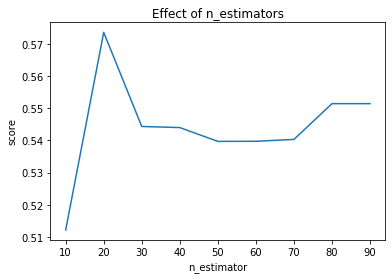

In [28]:
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    dt.set_params(max_depth=n)
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [29]:
dt.score(X_test,y_test)

0.5514119094974486

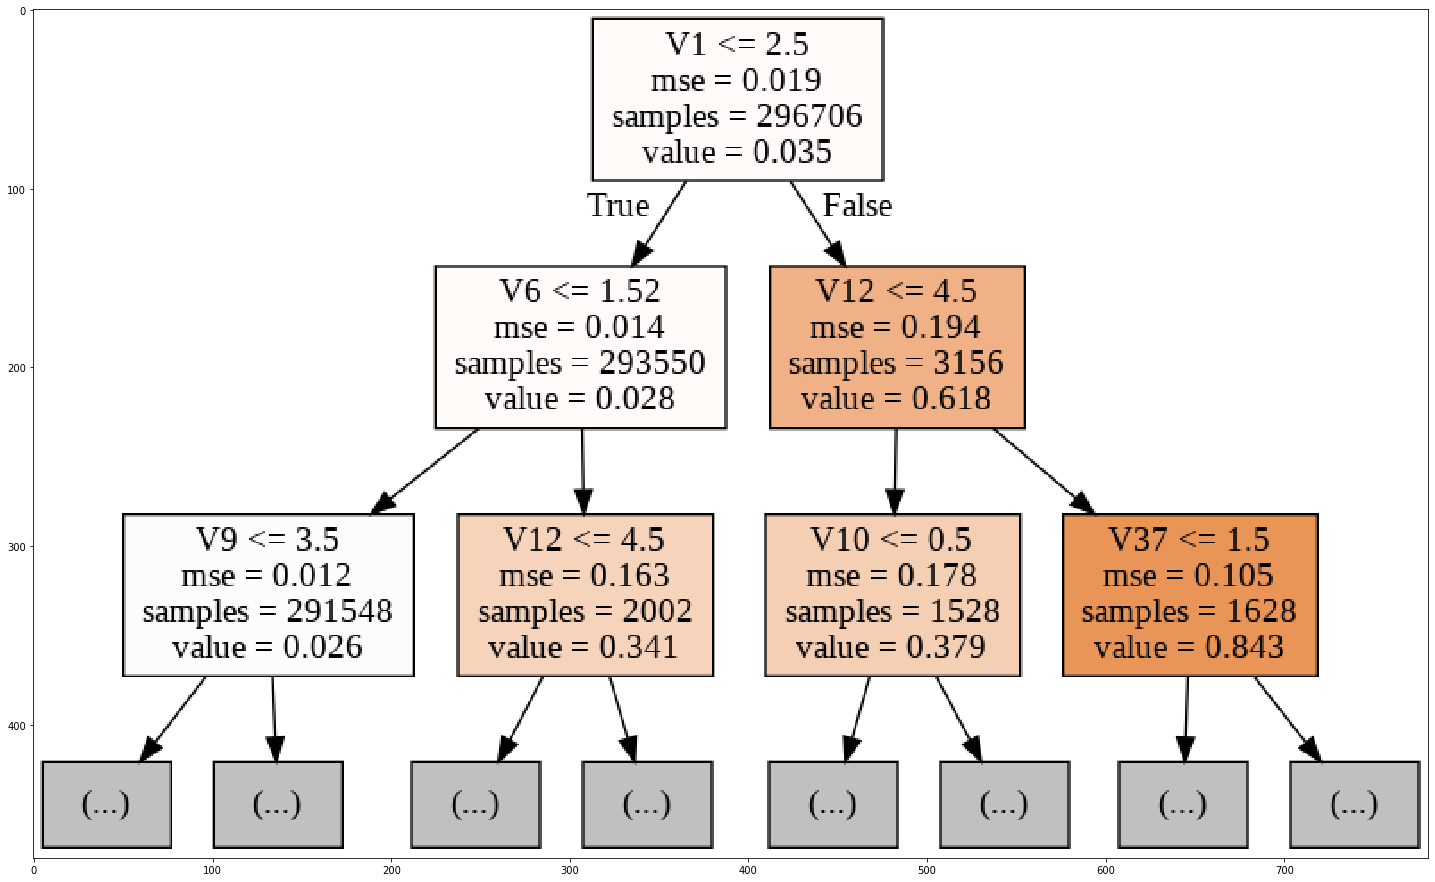

In [30]:
# Visualising the decision tree
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=X_train.columns, filled=True, max_depth=2)

# converting the dot image to png format
!dot -Tpng tree.dot -o tree.png

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

In [31]:
# creating the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
print("Getting Model Accuracy...")

# Get regression details
#print("Estimated Coefficient = ", regressor.coef_)
#print("Estimated Intercept = ", regressor.intercept_)
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy = ", rf.score(X_test, y_test))

print("\n")

In [0]:
# feature importance of the random forest model
feature_importance = pd.DataFrame()
feature_importance['variable'] = X_train.columns
feature_importance['importance'] = rf.feature_importances_

# feature_importance values in descending order
feature_importance.sort_values(by='importance', ascending=False).head(10)

In [0]:
#Global surrogate
# saving the predictions of Random Forest as new target
new_target = rf.predict(X_train)

# defining the interpretable decision tree model
dt_model = DecisionTreeRegressor(max_depth=15, random_state=10)

# fitting the surrogate decision tree model using the training set and new target
dt_model.fit(X_train,new_target)

In [0]:
# Visualising the decision tree
decision_tree = tree.export_graphviz(dt_model, out_file='tree1.dot', feature_names=X_train.columns, filled=True, max_depth=2)

# converting the dot image to png format
!dot -Tpng tree1.dot -o tree1.png

#plotting the decision tree
image = plt.imread('tree1.png')
plt.figure(figsize=(25,25))
plt.imshow(image)